### Here we test different values for Gamma and conclude that gamma has no influence on P&L

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def simple(k, gamma, sigma, A, s, q0, x0, T, N):
    
    alpha = 0.5*k*gamma*sigma**2
    eta = A*(1 + gamma/k)**(-(1 + k/gamma))
    
    dt = T/N
    delta_a_list = np.zeros(N+1)
    delta_b_list = np.zeros(N+1)
    q_list = np.zeros(N+1)
    x_list = np.zeros(N+1)
    q_list[0] = q0
    x_list[0] = x0
    delta_b = 1/gamma*np.log(1 + gamma/k) + 1/(2*k)*(alpha/eta)**0.5*(2*q_list[0] + 1)
    delta_a = 1/gamma*np.log(1 + gamma/k) - 1/(2*k)*(alpha/eta)**0.5*(2*q_list[0] - 1)
    delta_a_list[0] = delta_a
    delta_b_list[0] = delta_b
    
    for i in range(N):
        lab_a = A*np.exp(-k*delta_a)
        lab_b = A*np.exp(-k*delta_b)

        na = np.random.poisson(lam = lab_a*dt)
        nb = np.random.poisson(lam = lab_b*dt)
        
        q_list[i+1] = q_list[i] + nb - na
        x_list[i+1] = x_list[i] + (s[i] + delta_a)*na - (s[i] - delta_b)*nb
        #print('na =', na, 'nb =', nb, 'q =', q_list[i])
        
        delta_b = 1/gamma*np.log(1 + gamma/k) + 1/(2*k)*(alpha/eta)**0.5*(2*q_list[i+1] + 1)
        delta_a = 1/gamma*np.log(1 + gamma/k) - 1/(2*k)*(alpha/eta)**0.5*(2*q_list[i+1] - 1)
        
        delta_a_list[i+1] = delta_a
        delta_b_list[i+1] = delta_b
        
    pol = x_list + q_list*s
    return pol, delta_a_list, delta_b_list, q_list, x_list

In [4]:
def bm(s0, T, N, sigma, mu = 0):
    dt = T/N
    s = np.zeros(N+1)
    s[0] = s0
    for i in range(N):
        s[i+1] = s[i] + mu*dt + np.random.normal()*sigma*(dt)**0.5
    
    return s

In [5]:
k = 0.3*100
gamma = 0.01*100
sigma = 0.4*0.01
A = 0.9
q0 = 0
x0 = 0
T = 600
N = 600
s0 = 100

s = bm(s0, T, N, sigma)

In [6]:
gamma_list = np.array(range(1, 21))/2
pol_matrix = np.zeros((20, N+1))
a_matrix = np.zeros((20, N+1))
b_matrix = np.zeros((20, N+1))
q_matrix = np.zeros((20, N+1))
x_matrix = np.zeros((20, N+1))
for i in range(20):
    pol_matrix[i,], a_matrix[i,], b_matrix[i,], q_matrix[i,], x_matrix[i,] = simple(k, gamma_list[i], sigma, A, s, q0, x0, T, N)

horizon = np.array(range(N+1))*T/N

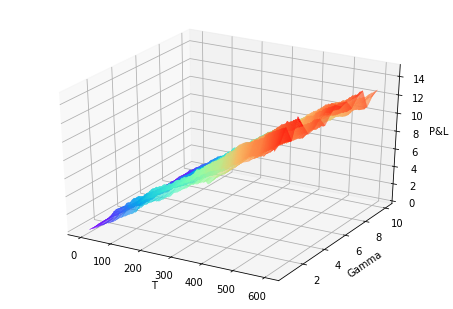

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
horizon = np.array(range(N+1))*T/N
gamma_list = np.array(range(1, 21))/2
horizon, gamma_list = np.meshgrid(horizon, gamma_list)

ax.plot_surface(horizon, gamma_list, pol_matrix, rstride=1, cstride=1, cmap='rainbow')
ax.set_xlabel("T")
ax.set_ylabel("Gamma")
ax.set_zlabel("P&L")

plt.show()

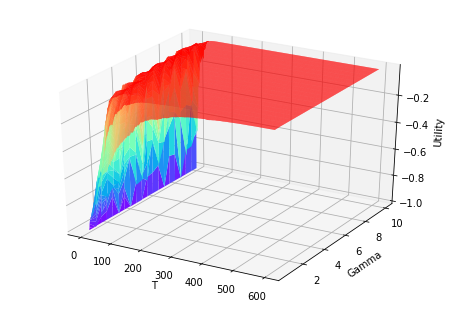

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
horizon = np.array(range(N+1))*T/N
gamma_list = np.array(range(1, 21))/2
horizon, gamma_list = np.meshgrid(horizon, gamma_list)

ax.plot_surface(horizon, gamma_list, -np.exp(-gamma_list*pol_matrix), rstride=1, cstride=1, cmap='rainbow')
ax.set_xlabel("T")
ax.set_ylabel("Gamma")
ax.set_zlabel("Utility")

plt.show()

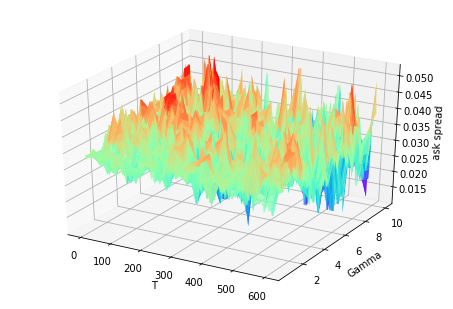

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
horizon = np.array(range(N+1))*T/N
gamma_list = np.array(range(1, 21))/2
horizon, gamma_list = np.meshgrid(horizon, gamma_list)

ax.plot_surface(horizon, gamma_list, a_matrix, rstride=1, cstride=1, cmap='rainbow')
ax.set_xlabel("T")
ax.set_ylabel("Gamma")
ax.set_zlabel("ask spread")

plt.show()

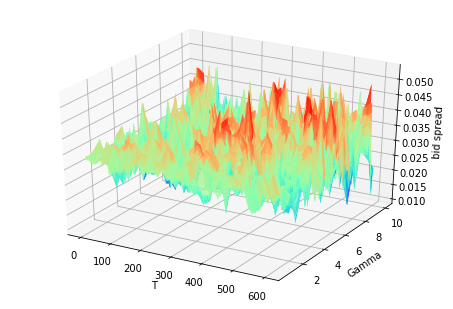

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
horizon = np.array(range(N+1))*T/N
gamma_list = np.array(range(1, 21))/2
horizon, gamma_list = np.meshgrid(horizon, gamma_list)

ax.plot_surface(horizon, gamma_list, b_matrix, rstride=1, cstride=1, cmap='rainbow')
ax.set_xlabel("T")
ax.set_ylabel("Gamma")
ax.set_zlabel("bid spread")

plt.show()

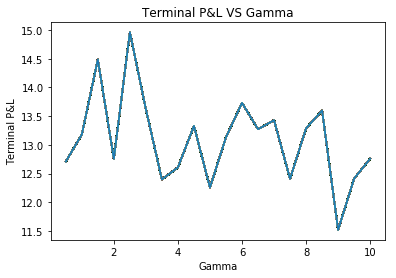

In [12]:
plt.plot(gamma_list, pol_matrix[:,N])
plt.xlabel('Gamma')
plt.ylabel('Terminal P&L')
plt.title('Terminal P&L VS Gamma')
plt.show()